# Imports

In [1077]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt

# Load the Image

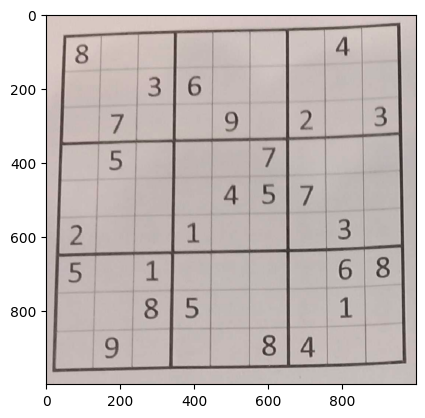

In [1078]:
# req = urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXWgbXAGTp-igspDP1qDo3aFJeE4vd_2u3Og&usqp=CAU')
# req = urllib.request.urlopen('https://live.staticflickr.com/8027/6978422072_33ac92fe1a_b.jpg')
# req = urllib.request.urlopen('https://jump.dev/JuMP.jl/stable/assets/partial_sudoku.png')
# req = urllib.request.urlopen('https://sources.roboflow.com/dcbM99GUgvVCEMo4F2rq8vaVApB2/DSJGI2e7g77XqctWIGQG/original.jpg')
# req = urllib.request.urlopen('https://cdn.britannica.com/42/97142-131-E3E24AA5/sudoku-puzzle-games.jpg')



# arr = np.asarray(bytearray(req.read()), dtype=np.uint8) #transform image to array
# img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.imread("/home/youssef/Projects/Sudoku-Image-Processing/Project Test Cases-20231212/01.jpg")
plt.imshow(img, cmap="gray")

# Convert to Grayscale

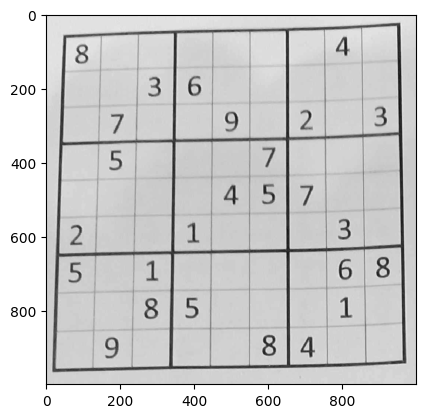

In [1079]:

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap="gray") 

# Adaptive Thresholding

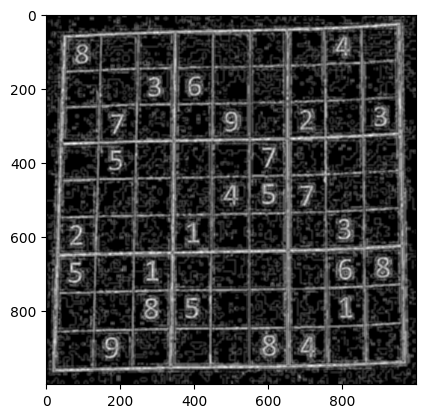

In [1080]:
img_gray_threshed = cv2.adaptiveThreshold(src=gray_image,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=5,
    C=1
)
img_gray_threshed = cv2.GaussianBlur(img_gray_threshed,(7,7),cv2.BORDER_DEFAULT)
plt.imshow(img_gray_threshed, cmap="gray")

In [1081]:
# closed_grid = np.zeros_like(img_gray_threshed, dtype = np.uint8)
# closed_grid = cv2.morphologyEx(img_gray_threshed, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))
# plt.imshow(closed_grid, cmap="gray")

# Get the largest object in the image using Cotours
## *It is assumed that the sudoku frame is the largest object in the image*

In [1082]:

# max = -1
# x = -1
# contours, _ = cv2.findContours(img_gray_threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# selected_contours = []
# sudoku_square = np.zeros(img_gray_threshed.shape, np.uint8)
# for i in range(len(contours)):
#   area = cv2.contourArea(contours[i])
#   # peri = cv2.arcLength(contours[i], True)
#   # approx = cv2.approxPolyDP(contours[i], 0.015 * peri, True)
#   if area > max: #and len(approx) == 4:
#      max = area
#      x = i   

# selected_contours.append(contours[x])
# cv2.fillPoly(sudoku_square, pts=selected_contours, color= (255,255,255))
# plt.imshow(sudoku_square, cmap="gray")

# Extract Edges using Canny

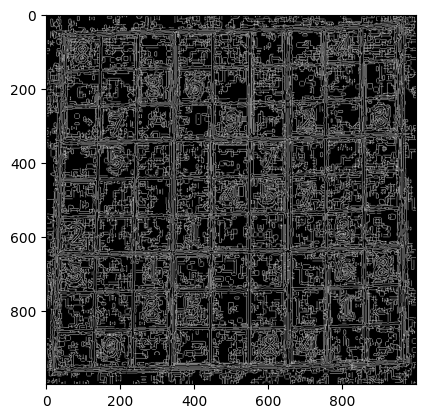

In [1083]:
canny_img = cv2.Canny(img_gray_threshed, 50, 150)
plt.imshow(canny_img, cmap="gray")

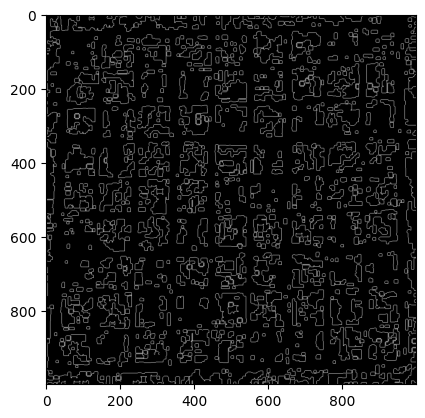

In [1084]:
closed_grid = np.zeros_like(img_gray_threshed, dtype = np.uint8)
closed_grid = cv2.morphologyEx(canny_img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7)))
#plt.imshow(closed_grid, cmap="gray")

newimg = cv2.Canny(closed_grid, 50, 150)
plt.imshow(newimg, cmap='gray')

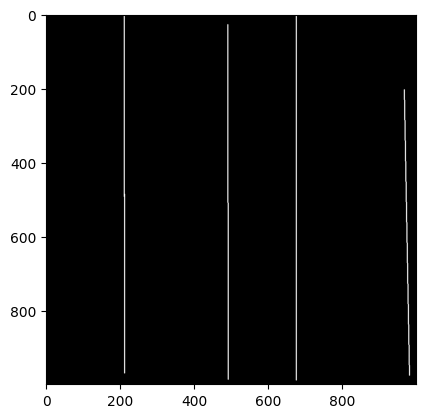

In [1085]:
## Hough
minLineLength = min(img_gray_threshed.shape[0],img_gray_threshed.shape[1])/2
hough_linesy = cv2.HoughLinesP(
    image=newimg,
    rho=1,  # Distance resolution of the accumulator in pixels.
    theta=0.00115,  # Angle resolution of the accumulator in radians.
    threshold=200,  # Voting threshold for accumulator.
    lines=None,
    minLineLength=minLineLength,  #  Line segments shorter than that are rejected.
    maxLineGap=100 # Maximum allowed gap between points on the same line to link them.
)


for x0, y0, x1, y1 in hough_linesy[:,0]:
    cv2.line(img_gray_threshed, (x0, y0), (x1, y1), (255,0,0), 2, cv2.LINE_AA)
tmp_imgy = np.zeros_like(img_gray_threshed, dtype = np.uint8)
for x1, y1, x2, y2 in hough_linesy[:,0]: cv2.line(tmp_imgy,(x1,y1),(x2,y2),(255,0,0),2)

plt.imshow(tmp_imgy, cmap='gray')

# Get the corners using Harris

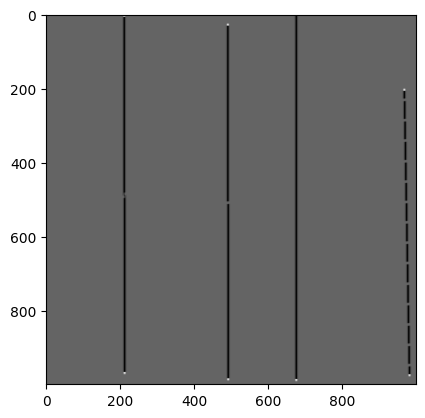

In [1086]:
Gaussian_box = cv2.cornerHarris(tmp_imgy, 7, 3, 0.04) 

plt.imshow(Gaussian_box, cmap="gray")

# Apply a Gaussian Filter, get the absolute values, then Threshhold to only get the corner points

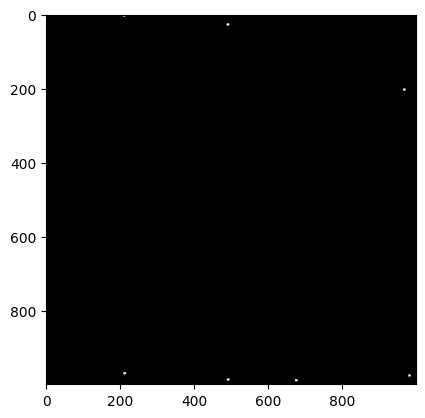

In [1087]:
kernel = np.ones((5, 5), np.uint8) 
  

# Gaussian_box = cv2.dilate(Gaussian_box, kernel, iterations=1)

ret, Gaussian_box = cv2.threshold(Gaussian_box, 0.002, 255, cv2.THRESH_BINARY)

plt.imshow(Gaussian_box, cmap='gray')

# Gaussian_box = cv2.GaussianBlur(dest,(7,7), 0)
# Gaussian_box = np.abs(Gaussian_box)


# ret, thresh1 = cv2.threshold(Gaussian_box, 0.002, 255, cv2.THRESH_BINARY) 

# dest = cv2.cornerHarris(thresh1, 7, 3, 0.04) 

# dest = np.abs(dest)
# ret, thresh1 = cv2.threshold(dest, 0, 255, cv2.THRESH_BINARY) 

# plt.imshow(Gaussian_box, cmap="gray")

# Get the coordinates of the Corners

In [1088]:
center_point = (Gaussian_box.shape[0] // 2, Gaussian_box.shape[1] // 2)

left_part = Gaussian_box[:, :center_point[1]]

right_part = Gaussian_box[:, center_point[1]:]


top_left_part = left_part[:center_point[0], :]
bottom_left_part = left_part[center_point[0]:, :]

top_right_part = right_part[:center_point[0], :]
bottom_right_part = right_part[center_point[0]:, :]

c1 = (-1, -1)
found = False
for i in range(len(top_left_part)):
    for j in range(len(top_left_part[0])):
        if top_left_part[i][j] > 0:
            c1 = (i+10, j+10)
            found = True
            break
    if found:
        break



c2 = (-1, -1)
found = False
for i in range(len(top_right_part)):
    for j in range(len(top_right_part[0])):
        if top_right_part[i][j] > 0:
            c2 = (i+10, j + center_point[1]+10)
            found = True
            break
    if found:
        break


c3 = (-1, -1)
found = False
for i in range(len(bottom_left_part)):
    for j in range(len(bottom_left_part[0])):
        if bottom_left_part[i][j] > 0:
            c3 = (i + center_point[0]+10, j+10)
            found = True
            break
    if found:
        break


c4 = (-1, -1)
found = False
for i in range(len(bottom_right_part)):
    for j in range(len(bottom_right_part[0])):
        if bottom_right_part[i][j] > 0:
            c4 = (i + center_point[0]+10, j + center_point[1]+10)
            found = True
            break
    if found:
        break


print(c1)
print(c2)
print(c3)
print(c4)

(10, 219)
(211, 976)
(978, 219)
(984, 989)


# Perspective Transform

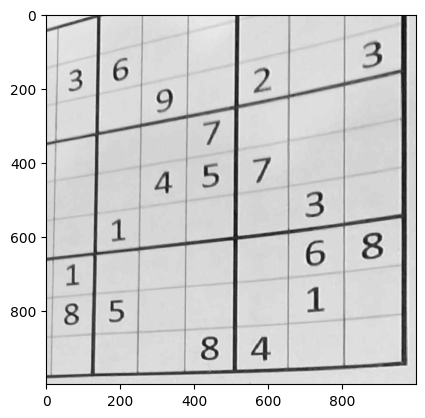

In [1089]:
input_points = np.float32([c1[::-1], c2[::-1], c3[::-1], c4[::-1]])
width = img.shape[1]
height = img.shape[0]

converted_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
matrix = cv2.getPerspectiveTransform(input_points, converted_points)
# print(matrix)
img_output = cv2.warpPerspective(gray_image, matrix, (width, height))
plt.imshow(img_output, cmap="gray")

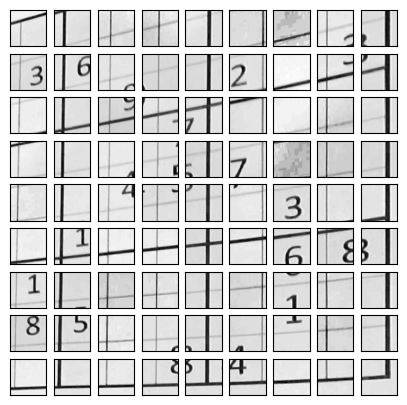

In [1090]:
M = img_output.shape[0] // 9
N = img_output.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_output[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)